## DAB200 -- Graded Lab 1

In this lab, you will gain some experience in **denoising** a dataset in the context of a specific objective. 

**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

**Data set**: make sure you use the data with the same number as your group number!

| Group | Data set |
| :-: | :-: |
| 1 | rent_1.csv |
| 2 | rent_2.csv |
| etc. | etc. |

**Important Notes:**
 - This lab is more open-ended so be prepared to think on your own, in a logical way, in order to solve the problem at hand
     - You should be able to support any decision you make with logical evidence
 - The data looks like the data we have been using in class but it has other **surprises**
     - Be sure to investigate the data in a way that allows you to discover all these surprises
 - Use [Chapter 5](https://mlbook.explained.ai/prep.html) of the textbook as a **guide**, except:
     - you only need to use **random forest** models;
     - exclude Section 5.5; 
 - Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
 - Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
 - Don't make assumptions!

I have broken the lab down into 4 main parts. 

### Part 0

Please provide the following information:
 - Group Number: Group 10
 - Group Members
     - Danielle Do Val Goncalves Tudeia (W0823569)
     - Fernanda Barbieri de Camargo (W0825882)
     - Mostafa Issa Mahmoud Kanaan (Student ID)

     

### Part 1 - Create and evaluate an initial model

#### Code (15 marks)

In [62]:
import pandas as pd

In [63]:
# read and understand the data frame structure
df = pd.read_csv("rent_10.csv")
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        20000 non-null  float64
 1   bedrooms         20000 non-null  int64  
 2   building_id      20000 non-null  object 
 3   created          20000 non-null  object 
 4   description      19399 non-null  object 
 5   display_address  19943 non-null  object 
 6   features         20000 non-null  object 
 7   latitude         20000 non-null  float64
 8   longitude        20000 non-null  float64
 9   manager_id       20000 non-null  object 
 10  photos           20000 non-null  object 
 11  price            20000 non-null  int64  
 12  street_address   19996 non-null  object 
 13  interest_level   20000 non-null  int64  
 14  num_desc_words   20000 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 2.3+ MB


In [64]:
# create a new data frame only with the numerical features
df_num = df[['bathrooms','bedrooms','latitude','longitude','price']]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  20000 non-null  float64
 1   bedrooms   20000 non-null  int64  
 2   latitude   20000 non-null  float64
 3   longitude  20000 non-null  float64
 4   price      20000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 781.4 KB


In [65]:
# make sure if we have any missin values
df_num.isnull().any() 

bathrooms    False
bedrooms     False
latitude     False
longitude    False
price        False
dtype: bool

In [66]:
# describe the data. PS: observe the "max" value -> 10 bathrooms, and the longitude (probably we have outliers)
df_num.describe() 

,bathrooms,bedrooms,latitude,longitude,price
count,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,1.211850,1.551500,38.562216,-70.486621,3.547407e+03
std,0.501106,1.112029,12.656632,41.806241,8.602687e+03
min,0.000000,0.000000,-41.363900,-176.805900,-2.500000e+04
25%,1.000000,1.000000,40.723900,-73.992700,2.450000e+03
50%,1.000000,1.000000,40.748700,-73.977900,3.100000e+03
75%,1.000000,2.000000,40.772300,-73.953800,4.025000e+03
max,10.000000,8.000000,42.303300,174.766400,1.150000e+06


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Bedrooms vs Bathrooms'}, xlabel='bedrooms', ylabel='bathrooms'>

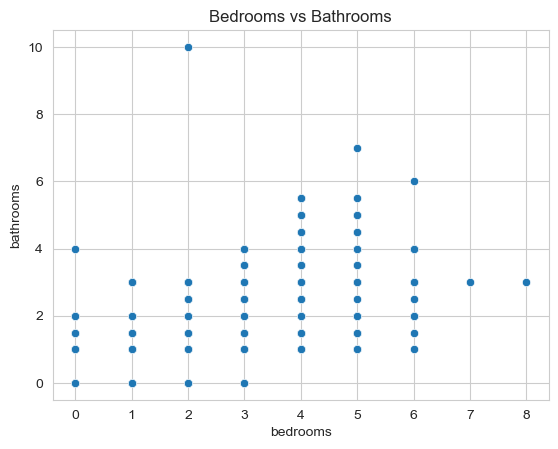

In [68]:
# Check for some possible outliers (analyzing bedrooms vs bathrooms)
sns.set_style("whitegrid")
h = sns.scatterplot(x= 'bedrooms', y = 'bathrooms', data = df_num)
plt.title("Bedrooms vs Bathrooms")
h

In [69]:
# Check how many apartments we have grouping them by number of bedrooms
df_num['bedrooms'].value_counts()

1    6421
2    5986
0    3733
3    2960
4     767
5     112
6      19
8       1
7       1
Name: bedrooms, dtype: int64

In [70]:
# Check how many apartments we have grouping them by number of bathrooms
df_num['bathrooms'].value_counts()

1.0     15951
2.0      3095
3.0       312
1.5       284
0.0       133
2.5       121
4.0        60
3.5        23
5.0         8
4.5         7
5.5         3
6.0         1
7.0         1
10.0        1
Name: bathrooms, dtype: int64

<AxesSubplot:title={'center':'NY Lat, Long = (40.71427, -74.00597)'}, xlabel='longitude', ylabel='latitude'>

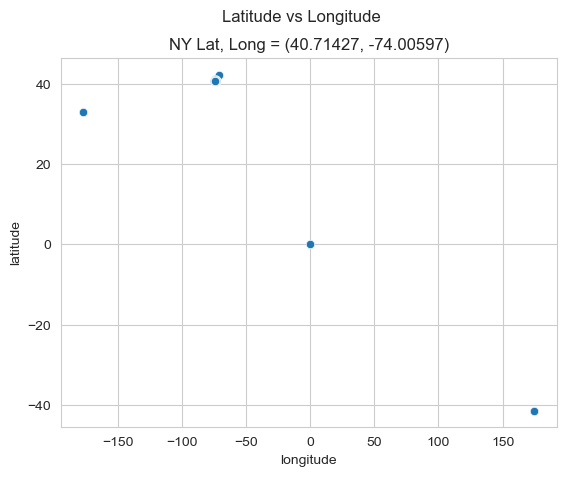

In [71]:
# Check for some possible outliers (analyzing latitude vs longitude)
sns.set_style("whitegrid")
h = sns.scatterplot(x= 'longitude', y = 'latitude', data = df_num)
plt.suptitle("Latitude vs Longitude")
plt.title("NY Lat, Long = (40.71427, -74.00597)")
h

<AxesSubplot:title={'center':'Bedrooms vs Price'}, xlabel='bedrooms', ylabel='price'>

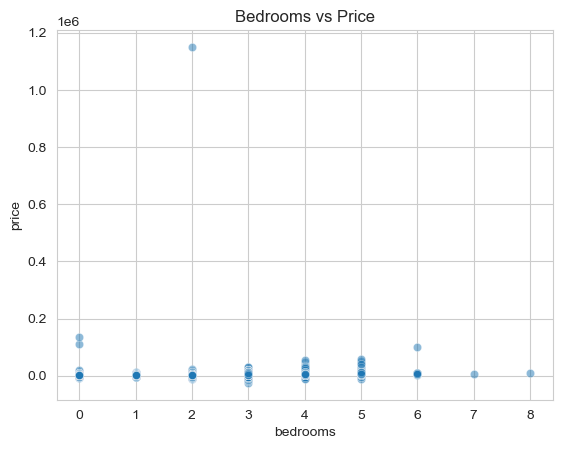

In [72]:
# Check for some possible outliers (analyzing bedrooms vs price)
sns.set_style("whitegrid")
h = sns.scatterplot(x= 'bedrooms', y = 'price', data = df_num, alpha = 0.5)
plt.title("Bedrooms vs Price")
h

In [73]:
# Check how many apartments we have grouping them by rent price
df_num["price"].value_counts()

2500    423
3200    372
2700    338
3000    324
2400    307
       ... 
5565      1
8722      1
3706      1
3596      1
1460      1
Name: price, Length: 2054, dtype: int64

In [74]:
df_num["price"].sort_values()

963       -25000
1039      -18000
17336     -14000
3744      -13995
16540     -11250
          ...   
11046      60000
7584      100000
7516      111111
19435     135000
17471    1150000
Name: price, Length: 20000, dtype: int64

In [75]:
# How many negative rent prices do we have?
df_num[df_num["price"] <= 0]

,bathrooms,bedrooms,latitude,longitude,price
79,1.0,1,32.8498,-176.8059,-2600
94,1.0,1,40.7186,-73.9860,-2600
96,1.0,1,40.7606,-73.9963,-3300
101,1.0,1,40.7755,-73.9531,-2295
155,1.0,2,40.7081,-74.0065,-5500
...,...,...,...,...,...
19842,1.0,1,40.7827,-73.9461,-2050
19884,2.0,3,40.7180,-74.0112,-5895
19927,1.0,0,40.7433,-73.9809,-2150
19948,1.0,1,40.7388,-73.9198,-1600


##### Train Data

In [76]:
# Create our train data
X_train = df_num.drop('price', axis = 1)
y_train = df_num['price']

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score = True, random_state = 30)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=30)

In [79]:
# Calculate the r2 score
r2 = rf.score(X_train, y_train)
print(r2)

0.8599020230321259


In [80]:
# Calculate the OOB
noisy_oob_r2 = rf.oob_score_
print("OOB score is", noisy_oob_r2)  #the result is the worst (the same as predict using only the average)

OOB score is -0.01812318891663467


#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 1** in the context of the overall objective. 

As we can observe, our main dataset (df) has missing values in the non-numerical features.

We created a new data set (df_num) only with the folowwing features ('bathrooms','bedrooms','latitude','longitude','price'). For this model, only these features will be taken into consideration for the analysis. There are no missing values.

Looking at the features description, we can observe some interesting things:
    - BATHROOM: we have apartments with 0 bathroom and 10 bathrooms; 0 bathrooms could not make any sense, and 10 bathrooms seems exagerated.
    - BEDROOMS: we have apartments with 0 bedrooms and 8 bedrooms; 0 bedrooms could not make any sense to an apartment, and 8 bedrooms could be exagerated.
    - LATITUDE: if some value is negative, it means that the apartment is located in the south hemisphere. New york latitude is 40.71427
    - LONGITUDE: we have longitude equals 174.766400 and -176.805900. New York longitude is -74.00597. 
    - PRICE: we have apartments with negative price (-2.500000e+04) which does not make any sense.
PS: the information about New York latitude and longitude can be found on https://www.geodatos.net/en/coordinates/united-states/new-york-city


Because we have found some inconsistencies in our dataset, some charts were plotted to understand the data.

- INCONSISTENCIES - BEDROM VS. BATHROOM
    - Apartments with many more bathrooms than bedrooms
    - Apartments with 0 bathrooms and more than 1 bedroom
    - Apartments with 0 bedrooms and more than 1 bathroom
    - POSSIBLE INCONSISTENCIE: apartments with 7 and 8 bedrooms
    
    
- INCONSISTENCIES - LATITUDE VS. LONGITUDE
    - New York coordinates are (40.71427, -74.00597). Any coordinate much different than this is wrong
    
    
- INCONSISTENCES - BEDROOM VS. PRICE
    - We have an apartment with 2 bedrooms with the rent price of $1.2MM
    - We have apartments with 0 bedrooms more expansive than apartments with 3 bedrooms
    - We have 491 negative prices

Then, we created our first model
- X_train = df_num.drop('price', axis = 1) -> our X_train variable is considering the features: bathrooms, bedrooms, latitude and longitude.
- y_train = df_num['price'] -> our y_train variable is our predicted variable, only considering the price feature.
- We created a variable "rf" to use the RandomForestRegressor algorithim considering 3 parameters:
    - number of estimators defines the number of decisions trees used in our model (for our case is 100)
    - number of jobs defines how many processors the train model can use in parallel. -1 means that all processors available can be used.
    - oob_score to estimate the generalization score. Our case is oob_score = True, so we can calculate it during the training phase
- Train the model - rf.fit(X_train, y_train) - using our training data defined.
- After all those steps, our model is trained and ready to be evaluated.

#### Evaluate the Model
Here we are going to evaluate our model using two methods: R^2 and oob_score.
- R^2 = 0.85 - approximately 84.43% of the variance of the 'price' can be explained by the independent variables ('bathrooms', 'bedrooms', 'latitude', 'longitude', 'price'). Only the R^2 score is not enough to determine if our model is a good model.
- OOB Score = -0.0181 - our model's predictions are performing poorly. The OOB value is calculated by testing the model on the data points that were not included in the bootstrap samples during training.

The model is not good. We must clean our data

### Part 2 - Denoise the data

This section should only include the code necessary to **denoise** the data, NOT the code necessary to identify inconsistencies, problems, errors, etc. in the data. 

#### Code (25 marks)

In [91]:
# Removing negative rent prices and overprices
df_clean = df_num[(df_num['price'] > 1000) & (df_num['price'] <= 100000)] 
df_clean

,bathrooms,bedrooms,latitude,longitude,price
0,1.0,2,40.6853,-73.9130,2195
1,1.0,1,40.7631,-73.9581,2100
2,1.0,0,40.7366,-73.9934,3200
3,0.0,0,40.7413,-73.9781,2653
4,1.0,2,40.6907,-73.9216,2933
...,...,...,...,...,...
19995,1.0,1,40.8675,-73.9241,2100
19996,1.0,3,40.7080,-74.0149,3995
19997,3.0,3,40.7669,-73.9621,11000
19998,1.0,0,40.7815,-73.9472,1825


In [92]:
# Removing the apartments outside NYC 
df_clean = df_clean[(df_clean['latitude'] <= 40.94) & (df_clean['latitude'] >= 40.55)] 
df_clean = df_clean[(df_clean['longitude'] >= -74.1) & (df_clean['longitude'] <= -73.67)]
df_clean

,bathrooms,bedrooms,latitude,longitude,price
0,1.0,2,40.6853,-73.9130,2195
1,1.0,1,40.7631,-73.9581,2100
2,1.0,0,40.7366,-73.9934,3200
3,0.0,0,40.7413,-73.9781,2653
4,1.0,2,40.6907,-73.9216,2933
...,...,...,...,...,...
19995,1.0,1,40.8675,-73.9241,2100
19996,1.0,3,40.7080,-74.0149,3995
19997,3.0,3,40.7669,-73.9621,11000
19998,1.0,0,40.7815,-73.9472,1825


In [93]:
# Removing the apartments - number of bathrooms are more or equal twice number of bedrooms 
df_clean = df_clean.drop(df_clean.index[df_clean['bathrooms'] >= 2*df_clean['bedrooms']])
df_clean

,bathrooms,bedrooms,latitude,longitude,price
0,1.0,2,40.6853,-73.9130,2195
1,1.0,1,40.7631,-73.9581,2100
4,1.0,2,40.6907,-73.9216,2933
6,1.0,1,40.7677,-73.9251,2350
7,1.0,1,40.7634,-73.9596,3565
...,...,...,...,...,...
19991,1.0,1,40.6575,-73.9505,1950
19993,1.0,1,40.7288,-74.0031,2800
19995,1.0,1,40.8675,-73.9241,2100
19996,1.0,3,40.7080,-74.0149,3995


### Part 3 - Create and evaluate a final model

#### Code (15 marks)

In [84]:
# Create our train data - final model
X_train_nm = df_clean.drop('price', axis = 1)
y_train_nm = df_clean['price']

In [85]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score = True, random_state = 30)
rf.fit(X_train_nm, y_train_nm)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=30)

In [86]:
# Calculate the r2 score
r2 = rf.score(X_train_nm, y_train_nm)
print(r2)

0.9603311710779848


In [87]:
# Calculate the OOB
noisy_oob_r2 = rf.oob_score_
print("OOB score is", noisy_oob_r2)  #the result is the worst (the same as predict using only the average)

OOB score is 0.8244244524038898


#### Explanation (5 marks)

Please provide an explanation and justification for the code submitted in **Part 3** in the context of the overall objective. 

We cleaned the data (denoise) by deleting apartments that:
   <br>- Have a rent price below 1k or above 100k (504 apartments deleted)
   <br>- Were outside NYC (981 apartments deleted)
   <br>- Have the number of bathrooms higher than twice the number of bedrooms (3533 apartments deleted)

Then we created our final model following the same steps we did on the first model but now using the cleaned dataset "df_clean". 

#### Evaluate the Model
Here we are going to evaluate our model using two methods: R^2 and oob_score.
- R^2 = 0.9603 - approximately 96% of the variance of the 'price' can be explained by the independent variables ('bathrooms', 'bedrooms', 'latitude', 'longitude', 'price'). Only the R^2 score is not enough to determine if our model is a good model.
- OOB Score = 0.8244 - our model's predictions are performing well. The OOB value is calculated by testing the model using the data points that were not included in the bootstrap samples during training.

The model is good now after denoise the data.

### Part 4 - Document the problems (35 marks)

In this part, please use the table below to document your understanding of all the data issues you discovered. Note that **no code** should be included, as that should be covered in **Part 2**. Also, note that even if one line of code fixed a few problems, you should list each problem separately in the table below, so be sure you have investigated the data properly. For example, if the list `[-6, 5, 0, 50]` represents heights of adults, the -6, 0, and 50 would represent three data issues to be included in the table below, even though one line of code may be able to address all of them. 

| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- | 
| Negative prices  | Negative price does not make sense    | Deleted the data  | We couldn't find data to adjust this information accurately    |
|  Unreal prices - Over  | Rent price of more then 100k for apartments of 0 to 2 bedrooms are not real  | Deleted the data | When you look to this rows information you can see that must be an error  |
|  Unreal prices - Lower  | Rent price of less then 1k for apartments have low probability of being real in NYC   | Deleted the data  | When you look to this rows you can see that must be an error  |
|  Apartments outside NYC  | Because they don't fit the model's goal    | Deleted the data  | Because we only can use data that fits our model's goal during its creation, otherwise the model won't be precise |
|  Unusual number of bathrooms  | When you look to this rows you can see that must be an error   | Deleted the data  | Kepping them could compromise our model's accuracy  |
